In [ ]:
#used google colab for coding hence the file path and other components related to the dataset must be changed when ran on Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sns.set()
#This part use Logistic regression to classify if the final result is a victory or not based on several indicators

In [ ]:
file_path = '/content/drive/MyDrive/EE0005 Mini Project/worlds2019_cleaned_calculated_revised.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head()

,team,KDARatio,teamdragkills,teambaronkills,herald,WardScoreperMin,gdat10,xpdat10,result
0,DetonatioN FocusMe,1.136364,1,0,0,4.974874,-1072,-203,0
1,Splyce,10.428571,2,1,1,4.937186,1072,203,1
2,Clutch Gaming,1.562500,0,0,1,4.991243,-230,-1547,0
3,Unicorns of Love,6.250000,4,2,0,5.175131,230,1547,1
4,Mammoth,8.625000,4,1,1,5.135255,-49,112,1


In [ ]:
df.describe()

,KDARatio,teamdragkills,teambaronkills,herald,WardScoreperMin,gdat10,xpdat10,result
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,5.013226,2.226891,0.710084,0.500000,5.334767,0.000000,0.000000,0.500000
std,6.135014,1.511905,0.743455,0.501054,0.759539,1294.486993,1013.910806,0.501054
min,0.200000,0.000000,0.000000,0.000000,3.602694,-3561.000000,-3229.000000,0.000000
25%,1.455921,1.000000,0.000000,0.000000,4.850035,-807.250000,-591.000000,0.000000
50%,3.134503,2.000000,1.000000,0.500000,5.250387,0.000000,0.000000,0.500000
75%,6.267045,3.000000,1.000000,1.000000,5.829360,807.250000,591.000000,1.000000
max,64.000000,6.000000,3.000000,1.000000,7.408451,3561.000000,3229.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             238 non-null    object 
 1   KDARatio         238 non-null    float64
 2   teamdragkills    238 non-null    int64  
 3   teambaronkills   238 non-null    int64  
 4   herald           238 non-null    int64  
 5   WardScoreperMin  238 non-null    float64
 6   gdat10           238 non-null    int64  
 7   xpdat10          238 non-null    int64  
 8   result           238 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 16.9+ KB


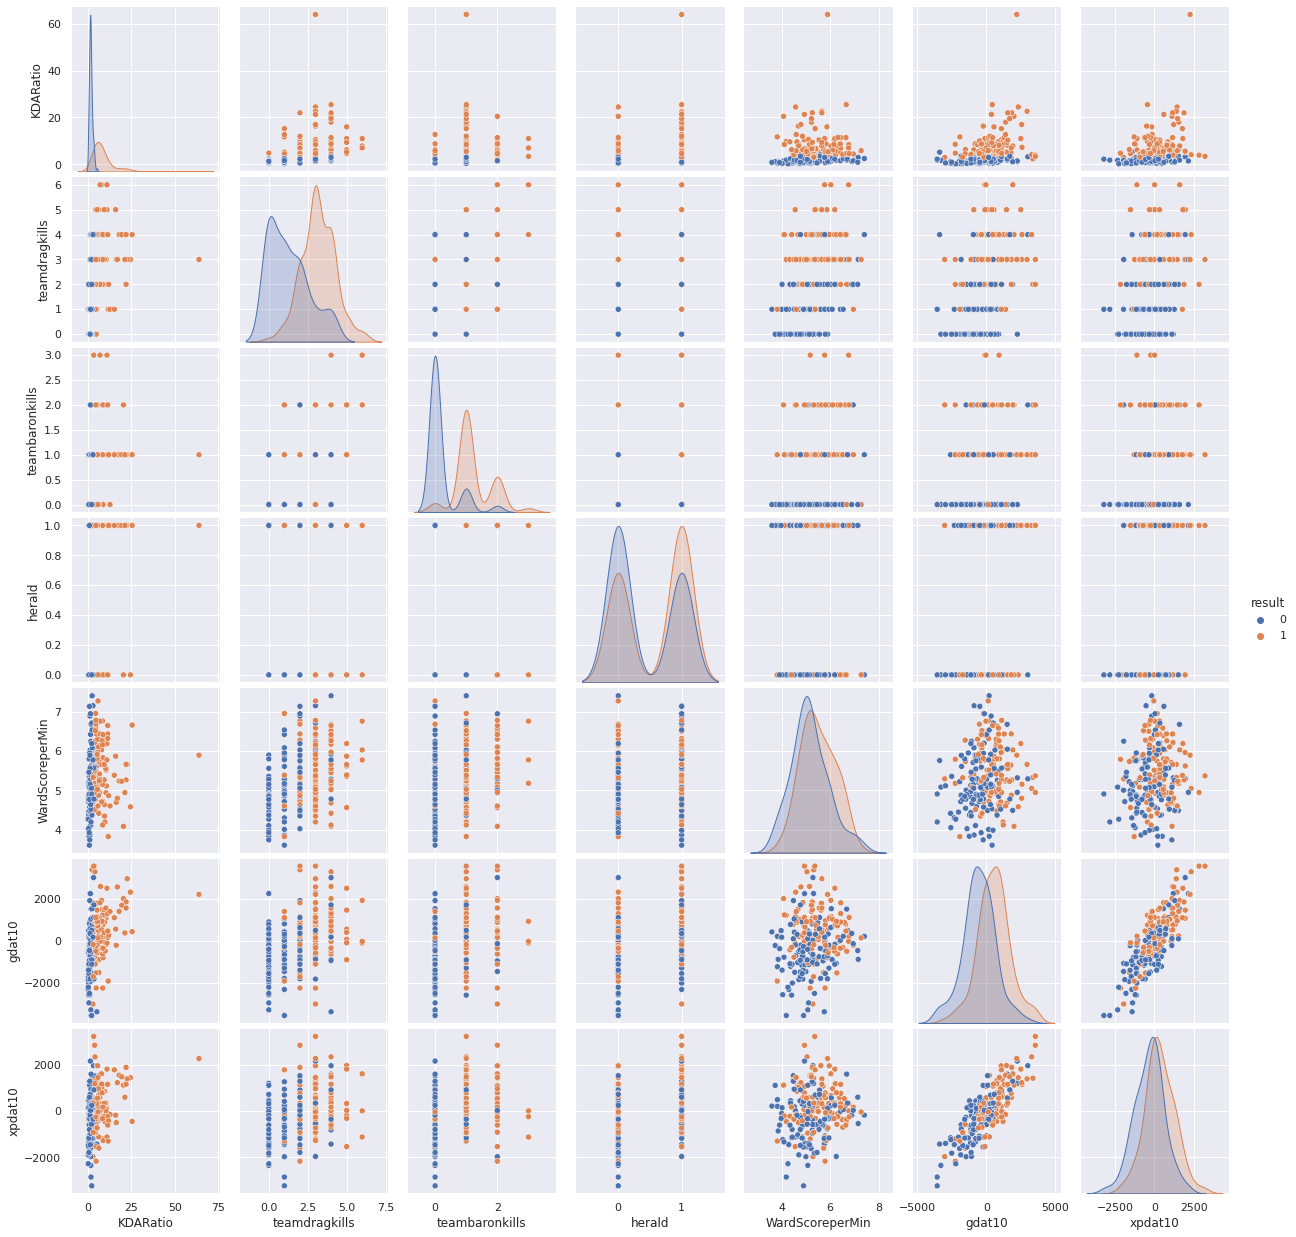

In [ ]:
sns.pairplot(df, hue='result', height=2.5)

In [ ]:
df['result'].value_counts()

1    119
0    119
Name: result, dtype: int64

In [ ]:
inp_df = df.drop(df.columns[[0,8]], axis=1)
out_df = df.drop(df.columns[[0,1,2,3,4,5,6,7]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [ ]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.values
y_ts_arr = y_test.values

In [ ]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (190, 7)
Output Shape (48, 7)


In [ ]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [ ]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [ ]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [ ]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]

Number of Features 7
Optimized weights [[0.10627258 0.13252422 0.14394872 0.03789962 0.04192712 0.08430636
  0.06118711]]
Optimized intercept -0.0030611684668740043


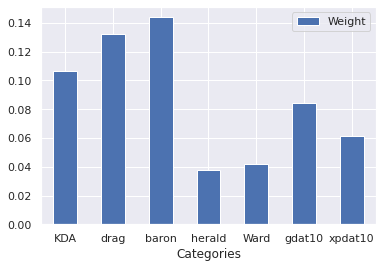

In [ ]:
df = pd.DataFrame({'Categories':['KDA', 'drag', 'baron', 'herald', 'Ward', 'gdat10', 'xpdat10'], 'Weight':[0.10627258, 0.13252422, 0.14394872, 0.03789962, 0.04192712, 0.08430636, 0.06118711]})
ax = df.plot.bar(x='Categories', y='Weight', rot=0)

In [ ]:
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

Training Accuracy 0.8789473684210526


In [ ]:
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Test Accuracy 0.8333333333333334


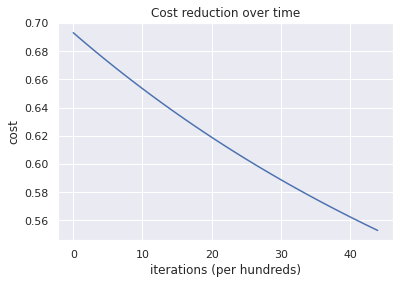

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
y_tr_arr = np.ravel(y_tr_arr)
clf.fit(X_tr_arr, y_tr_arr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print (clf.intercept_, clf.coef_)

[0.71572699] [[ 3.76147646  0.77897033  1.15817771  0.14483394 -0.10955845  0.45953707
  -0.04858595]]


In [ ]:
pred = clf.predict(X_ts_arr)

In [ ]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 0.9166666666666666


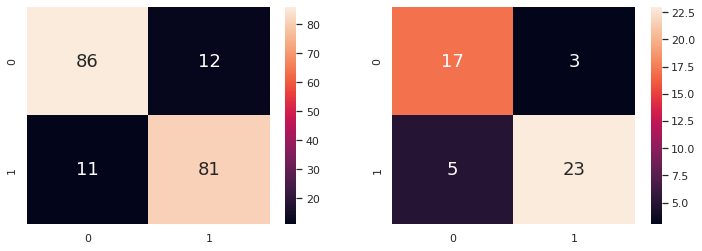

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_tr_pred.T, y_tr_arr),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_ts_pred.T, y_ts_arr), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
#Below is the random forest classification method

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestClassifier(n_estimators=60, random_state=10)
y_train = np.ravel(y_train)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [ ]:
y_train_pred = regressor.predict(X_train)
print('Training Accuracy',accuracy_score(y_train_pred, y_train))

Training Accuracy 1.0


In [ ]:
print('Test Accuracy',accuracy_score(y_pred, y_test))

Test Accuracy 0.9166666666666666


In [ ]:
#Below is the naive bayes prediction

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

In [ ]:
from sklearn import metrics

print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.9375


In [ ]:
print("Training Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9421052631578948


In [ ]:
#Algorithm for decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                    


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9421052631578948

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9166666666666666

